In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
textstr="King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom. Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia.He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well. He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses.Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down.Tenali Raman was hesitant, but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom!As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation. Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins.Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!"


In [ ]:
import nltk
nltk.download('punkt')
tokenized=word_tokenize(textstr)
print(f"Total frequency of words in the given string is {len(tokenized)}.")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Total frequency of words in the given string is 350.


In [ ]:
import nltk
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(f"Total frequency of stop words in english is {len(stop_words)}")

Total frequency of stop words in english is 179


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# FINDING THE TOKENIZED LIST OF ALL THE STRINGS IN THE DATA AFTER STOP WORDS REMOVAL AND PRINTING THEIR FREQUENCY
after_stop_word_removal=[]
for token in tokenized:
    if token.isalnum() and token.lower() not in stop_words:
        after_stop_word_removal.append(token)

In [ ]:
print(f"Total frequency of the words in the given string after stop words removal is {len(after_stop_word_removal)}")


Total frequency of the words in the given string after stop words removal is 156


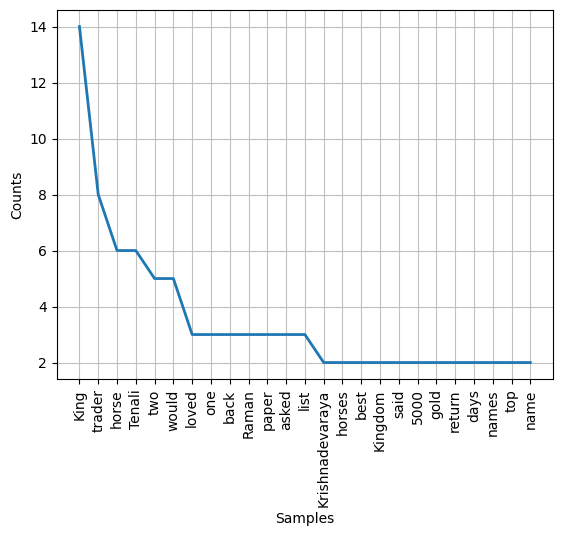

In [ ]:
# FREQUENCY DISTRIBUTION PLOT OF THE STOP WORDS
freqdist=FreqDist(after_stop_word_removal)
freqdist.plot(25, cumulative=False)
plt.show()

In [ ]:
# MOST FREQUENT WORDS IN THE STRINGS ARE GIVEN BELOW
print("Top 20 most frequent words in the given string are:")
for token in freqdist.most_common(20):
    print(token)

Top 20 most frequent words in the given string are:
('King', 14)
('trader', 8)
('horse', 6)
('Tenali', 6)
('two', 5)
('would', 5)
('loved', 3)
('one', 3)
('back', 3)
('Raman', 3)
('paper', 3)
('asked', 3)
('list', 3)
('Krishnadevaraya', 2)
('horses', 2)
('best', 2)
('Kingdom', 2)
('said', 2)
('5000', 2)
('gold', 2)


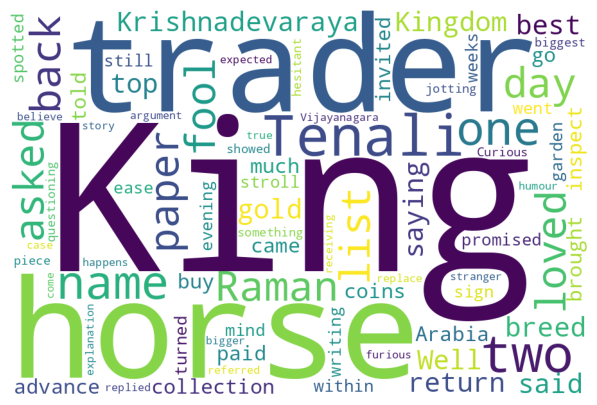

In [ ]:
wordcloud = WordCloud( width=900, height=600,background_color='white').generate(' '.join(after_stop_word_removal))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
top_words = dict(freqdist.most_common(10))
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(top_words)

In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

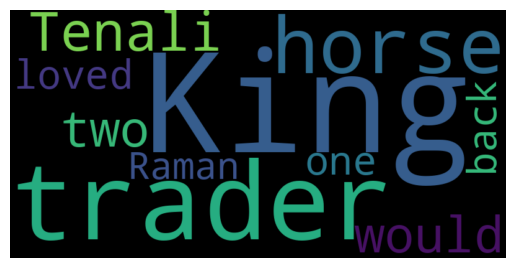

In [ ]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

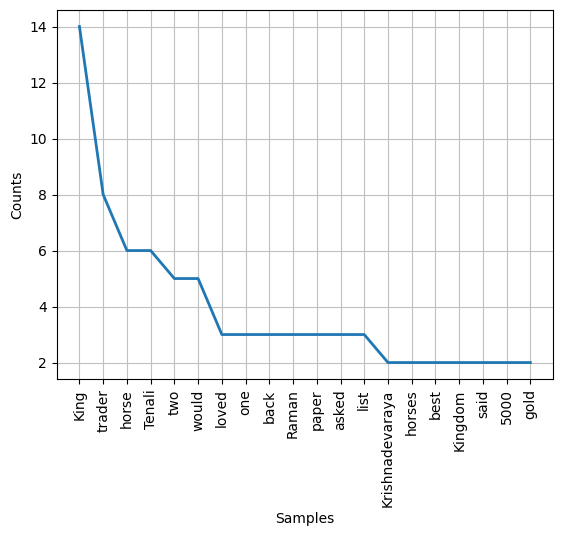

In [ ]:
freqdist.plot(20, cumulative=False)
plt.show()

In [ ]:
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Corpus
corpus = """
King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom.
Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia.
He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one
and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well.
He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses.
Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind,
the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious,
the King asked Tenali what he was jotting down. Tenali Raman was hesitant, but after further questioning, he showed the King the paper.
On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools
in the Vijayanagara Kingdom! As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation.
Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins.
Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying,
in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!
"""

In [ ]:
# Tokenization
import nltk
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
sentences = sent_tokenize(corpus)
words = word_tokenize(corpus)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]

# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentences)


In [ ]:
# N-grams
unigrams = list(ngrams(filtered_words, 1))
bigrams = list(ngrams(filtered_words, 2))
trigrams = list(ngrams(filtered_words, 3))

In [ ]:
# Frequency Distributions
freq_dist_unigrams = FreqDist(unigrams)
freq_dist_bigrams = FreqDist(bigrams)
freq_dist_trigrams = FreqDist(trigrams)

In [ ]:
# Print TF-IDF Matrix
print("TF-IDF Matrix:")
print(tfidf_matrix.toarray())

TF-IDF Matrix:
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.22450909 0.         0.22450909 ... 0.         0.18420973 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.34700726 0.        ]]


In [ ]:
# Print N-gram Distributions
print("\nUnigram Distribution:")
print(freq_dist_unigrams.most_common())


Unigram Distribution:
[(('king',), 14), (('trader',), 8), (('tenali',), 7), (('horse',), 6), (('two',), 6), (('would',), 5), (('one',), 4), (('loved',), 3), (('horses',), 3), (('back',), 3), (('raman',), 3), (('paper',), 3), (('asked',), 3), (('list',), 3), (('krishnadevaraya',), 2), (('best',), 2), (('kingdom',), 2), (('well',), 2), (('arabia',), 2), (('said',), 2), (('5000',), 2), (('gold',), 2), (('coins',), 2), (('return',), 2), (('days',), 2), (('names',), 2), (('top',), 2), (('name',), 2), (('saying',), 2), (('fool',), 2), (('collection',), 1), (('breeds',), 1), (('day',), 1), (('came',), 1), (('told',), 1), (('brought',), 1), (('breed',), 1), (('invited',), 1), (('inspect',), 1), (('could',), 1), (('buy',), 1), (('like',), 1), (('go',), 1), (('get',), 1), (('much',), 1), (('paid',), 1), (('advance',), 1), (('promised',), 1), (('within',), 1), (('turned',), 1), (('weeks',), 1), (('still',), 1), (('sign',), 1), (('evening',), 1), (('ease',), 1), (('mind',), 1), (('went',), 1), ((

In [ ]:
print("\nBigram Distribution:")
print(freq_dist_bigrams.most_common())


Bigram Distribution:
[(('tenali', 'raman'), 3), (('king', 'krishnadevaraya'), 2), (('krishnadevaraya', 'loved'), 2), (('loved', 'horse'), 2), (('5000', 'gold'), 2), (('gold', 'coins'), 2), (('would', 'return'), 2), (('two', 'days'), 2), (('king', 'asked'), 2), (('asked', 'tenali'), 2), (('loved', 'horses'), 1), (('horses', 'best'), 1), (('best', 'collection'), 1), (('collection', 'horse'), 1), (('horse', 'breeds'), 1), (('breeds', 'kingdom'), 1), (('kingdom', 'well'), 1), (('well', 'one'), 1), (('one', 'day'), 1), (('day', 'trader'), 1), (('trader', 'came'), 1), (('came', 'king'), 1), (('king', 'told'), 1), (('told', 'brought'), 1), (('brought', 'horse'), 1), (('horse', 'best'), 1), (('best', 'breed'), 1), (('breed', 'arabia'), 1), (('arabia', 'invited'), 1), (('invited', 'king'), 1), (('king', 'inspect'), 1), (('inspect', 'horse'), 1), (('horse', 'king'), 1), (('horse', 'trader'), 1), (('trader', 'said'), 1), (('said', 'king'), 1), (('king', 'could'), 1), (('could', 'buy'), 1), (('bu

In [ ]:
print("\nTrigram Distribution:")
print(freq_dist_trigrams.most_common())


Trigram Distribution:
[(('king', 'krishnadevaraya', 'loved'), 2), (('5000', 'gold', 'coins'), 2), (('krishnadevaraya', 'loved', 'horses'), 1), (('loved', 'horses', 'best'), 1), (('horses', 'best', 'collection'), 1), (('best', 'collection', 'horse'), 1), (('collection', 'horse', 'breeds'), 1), (('horse', 'breeds', 'kingdom'), 1), (('breeds', 'kingdom', 'well'), 1), (('kingdom', 'well', 'one'), 1), (('well', 'one', 'day'), 1), (('one', 'day', 'trader'), 1), (('day', 'trader', 'came'), 1), (('trader', 'came', 'king'), 1), (('came', 'king', 'told'), 1), (('king', 'told', 'brought'), 1), (('told', 'brought', 'horse'), 1), (('brought', 'horse', 'best'), 1), (('horse', 'best', 'breed'), 1), (('best', 'breed', 'arabia'), 1), (('breed', 'arabia', 'invited'), 1), (('arabia', 'invited', 'king'), 1), (('invited', 'king', 'inspect'), 1), (('king', 'inspect', 'horse'), 1), (('inspect', 'horse', 'king'), 1), (('horse', 'king', 'krishnadevaraya'), 1), (('krishnadevaraya', 'loved', 'horse'), 1), (('lo

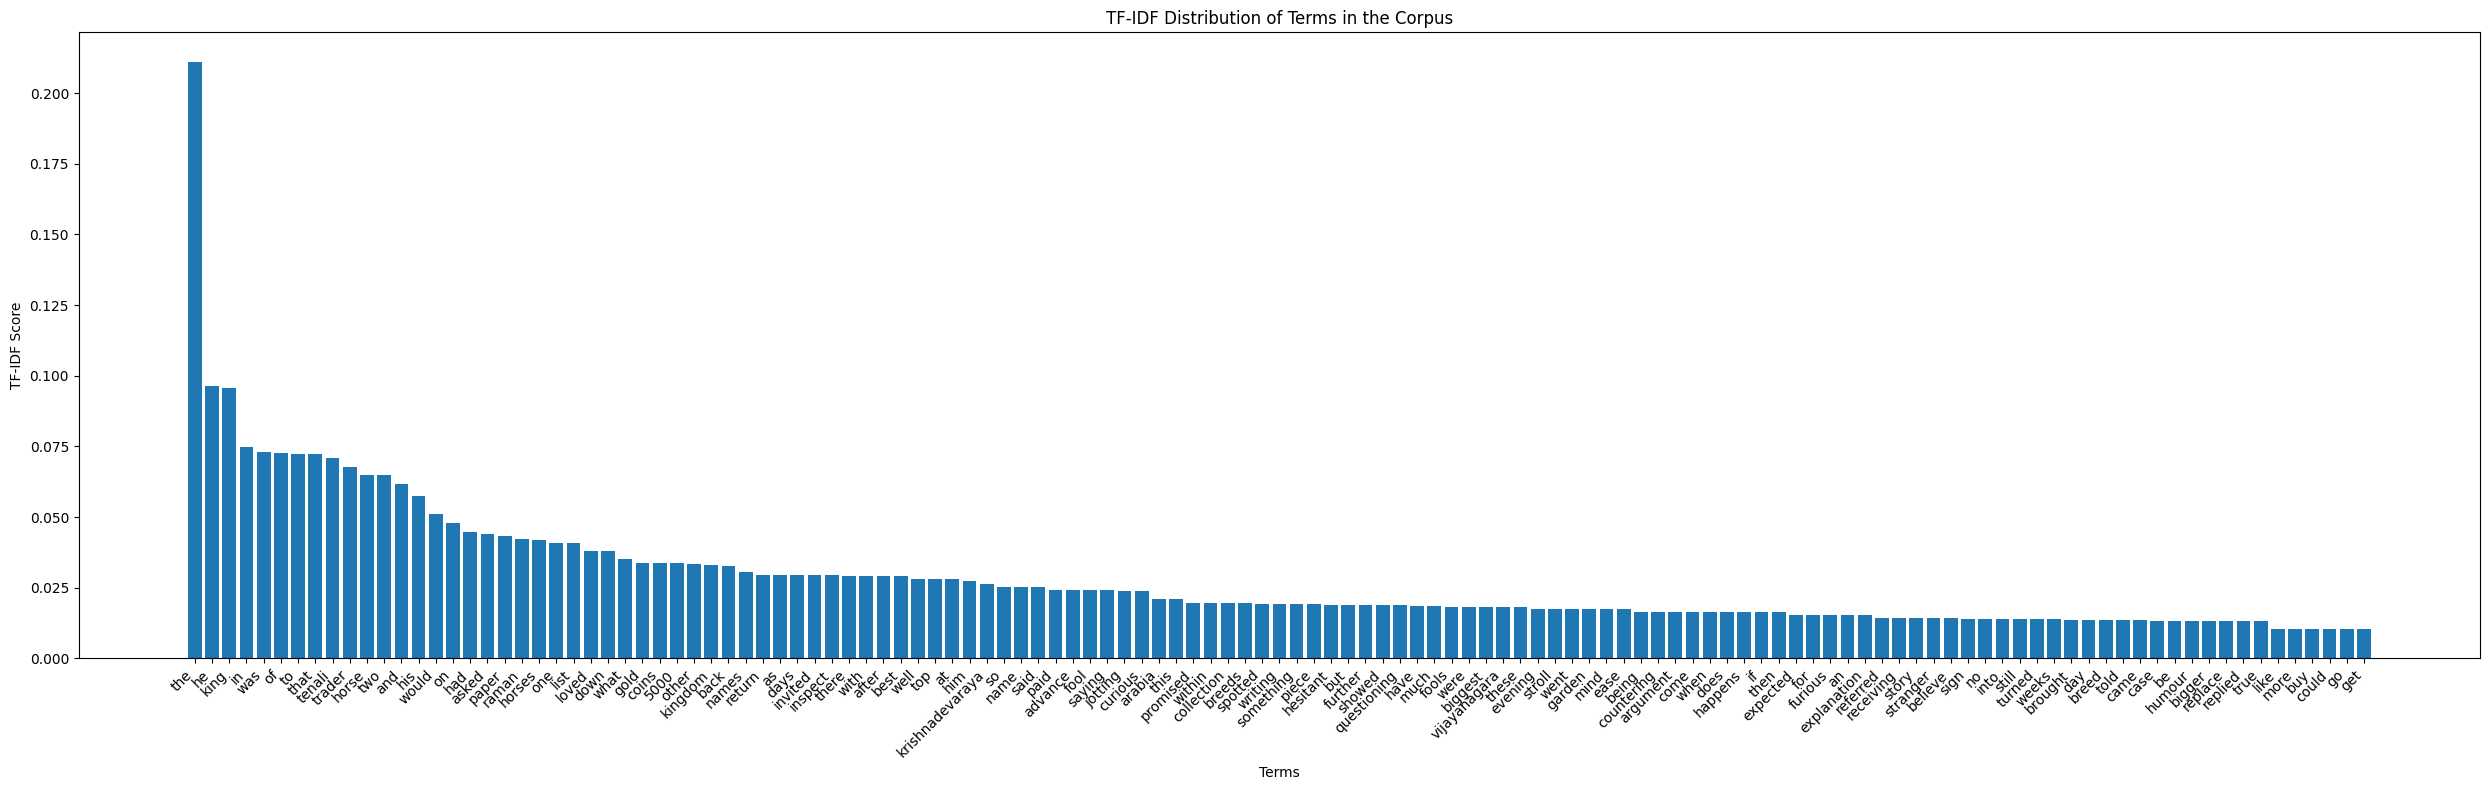

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot TF-IDF distribution
def plot_tfidf_distribution(tfidf_matrix, feature_names):
    tfidf_means = np.mean(tfidf_matrix.toarray(), axis=0)
    sorted_indices = np.argsort(tfidf_means)[::-1]
    sorted_features = [feature_names[idx] for idx in sorted_indices]
    sorted_tfidf_means = tfidf_means[sorted_indices]

    plt.figure(figsize=(25, 8))
    plt.bar(range(len(sorted_features)), sorted_tfidf_means, align='center')
    plt.xticks(range(len(sorted_features)), sorted_features, rotation=45, ha='right')
    plt.xlabel('Terms')
    plt.ylabel('TF-IDF Score')
    plt.title('TF-IDF Distribution of Terms in the Corpus')
    plt.tight_layout()
    plt.show()

# Get feature names from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Plot TF-IDF distribution
plot_tfidf_distribution(tfidf_matrix, feature_names)

In [ ]:
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk import pos_tag, RegexpParser
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
# Define the corpus
corpus = "King Krishnadevaraya loved horses and had the best collection of horse breeds in the Kingdom. Well, one day, a trader came to the King and told him that he had brought with him a horse of the best breed in Arabia. He invited the King to inspect the horse. King Krishnadevaraya loved the horse; so the trader said that the King could buy this one and that he had two more like this one, back in Arabia that he would go back to get. The King loved the horse so much that he had to have the other two as well. He paid the trader 5000 gold coins in advance. The trader promised that he would return within two days with the other horses. Two days turned into two weeks, and still, there was no sign of the trader and the two horses. One evening, to ease his mind, the King went on a stroll in his garden. There he spotted Tenali Raman writing down something on a piece of paper. Curious, the King asked Tenali what he was jotting down. Tenali Raman was hesitant, but after further questioning, he showed the King the paper. On the paper was a list of names, the King’s being at the top of the list. Tenali said these were the names of the biggest fools in the Vijayanagara Kingdom! As expected, the King was furious that his name was at the top and asked Tenali Raman for an explanation. Tenali referred to the horse story, saying the King was a fool to believe that the trader, a stranger, would return after receiving 5000 gold coins. Countering his argument, the King then asked, what happens if/when the trader does come back? In true Tenali humour, he replied saying, in that case, the trader would be a bigger fool, and his name would replace the King’s on the list!"

# Tokenize the corpus
import nltk
nltk.download('punkt')
tokens = word_tokenize(corpus)

# Part of speech tagging
nltk.download('averaged_perceptron_tagger')
tagged = pos_tag(tokens)

# Define a grammar for chunking
grammar = r"""
  NP: {<DT>?<JJ>*<NN>} # Noun Phrase
      {<NNP>+}          # Proper Nouns
"""

# Create a chunk parser
chunk_parser = RegexpParser(grammar)

# Chunk the tagged tokens
chunks = chunk_parser.parse(tagged)

# Extract noun phrases
noun_phrases = []
for chunk in chunks:
    if isinstance(chunk, nltk.Tree) and chunk.label() == 'NP':
        noun_phrases.append(' '.join([token[0] for token in chunk.leaves()]))

# Print the noun phrases
for np in noun_phrases:
    print(np)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Krishnadevaraya
collection
horse
Kingdom
Well
day
a trader
King
a horse
breed
Arabia
King
the horse
King Krishnadevaraya
the horse
the trader
King
Arabia
King
the horse
the trader
gold
advance
The trader
no sign
the trader
evening
mind
King
a stroll
garden
Tenali Raman
something
a piece
paper
King
Tenali
Tenali Raman
further questioning
King
the paper
the paper
a list
King ’
the top
the list
Tenali
Vijayanagara Kingdom
King
name
Tenali Raman
an explanation
Tenali
the horse
story
King
a fool
the trader
a stranger
gold
argument
King
the trader
Tenali
humour
that case
the trader
fool
name
King ’
s
the list


In [ ]:
from nltk.corpus import wordnet

# Define the words from the text
words = ["King", "Krishnadevaraya", "loved", "horses", "best", "collection", "horse", "breeds", "Kingdom",
         "trader", "came", "told", "brought", "horse", "best", "breed", "Arabia", "invited", "King",
         "inspect", "horse", "King", "Krishnadevaraya", "loved", "horse", "trader", "said", "King",
         "could", "buy", "one", "two", "like", "one", "back", "Arabia", "go", "back", "get",
         "King", "loved", "horse", "much", "two", "well", "paid", "trader", "5000", "gold", "coins",
         "advance", "trader", "promised", "would", "return", "within", "two", "days", "horses",
         "Two", "days", "turned", "two", "weeks", "still", "sign", "trader", "two", "horses",
         "One", "evening", "ease", "mind", "King", "went", "stroll", "garden", "spotted", "Tenali", "Raman",
         "writing", "something", "piece", "paper", "Curious", "King", "asked", "Tenali", "jotting",
         "Tenali", "Raman", "hesitant", "questioning", "showed", "King", "paper", "On", "paper",
         "list", "names", "King", "’", "top", "list", "Tenali", "said", "names", "biggest", "fools",
         "Vijayanagara", "Kingdom", "As", "expected", "King", "furious", "name", "top", "asked",
         "Tenali", "Raman", "explanation", "Tenali", "referred", "horse", "story", "saying", "King",
         "fool", "believe", "trader", "stranger", "would", "return", "receiving", "5000", "gold", "coins",
         "Countering", "argument", "King", "asked", "happens", "trader", "come", "back", "In", "true",
         "Tenali", "humour", "replied", "saying", "case", "trader", "would", "bigger", "fool", "name",
         "would", "replace", "King", "’", "list"]

# Function to get synsets for a word
import nltk
nltk.download('wordnet')
def get_synsets(word):
    return wordnet.synsets(word)

# Function to get hypernyms for a synset
def get_hypernyms(synset):
    return synset.hypernyms()

# Function to get hyponyms for a synset
def get_hyponyms(synset):
    return synset.hyponyms()

# Function to get meronyms for a synset
def get_meronyms(synset):
    return synset.part_meronyms() + synset.substance_meronyms() + synset.member_meronyms()

# Function to get holonyms for a synset
def get_holonyms(synset):
    return synset.part_holonyms() + synset.substance_holonyms() + synset.member_holonyms()

# Iterate over words and find semantic relationships
for word in words:
    synsets = get_synsets(word)
    for synset in synsets:
        hypernyms = get_hypernyms(synset)
        hyponyms = get_hyponyms(synset)
        meronyms = get_meronyms(synset)
        holonyms = get_holonyms(synset)
        print("Word:", word)
        print("Synset:", synset.name())
        print("Definition:", synset.definition())
        print("Hypernyms:", [hypernym.name() for hypernym in hypernyms])
        print("Hyponyms:", [hyponym.name() for hyponym in hyponyms])
        print("Meronyms:", [meronym.name() for meronym in meronyms])
        print("Holonyms:", [holonym.name() for holonym in holonyms])
        print()


[nltk_data] Downloading package wordnet to /root/nltk_data...


Streaming output truncated to the last 5000 lines.
Word: writing
Synset: writing.n.03
Definition: (usually plural) the collected work of an author
Hypernyms: ['oeuvre.n.01', 'written_communication.n.01']
Hyponyms: ['patristics.n.01']
Meronyms: []
Holonyms: []

Word: writing
Synset: writing.n.04
Definition: letters or symbols that are written or imprinted on a surface to represent the sounds or words of a language
Hypernyms: ['written_communication.n.01']
Hyponyms: ['capitalization.n.01', 'coding_system.n.01', 'handwriting.n.01', 'hieroglyph.n.01', 'notation.n.01', 'orthography.n.01', 'printing.n.01', 'printing.n.03', 'skywriting.n.01', 'typing.n.01']
Meronyms: []
Holonyms: []

Word: writing
Synset: writing.n.05
Definition: the activity of putting something in written form
Hypernyms: ['activity.n.01']
Hyponyms: ['cryptography.n.02', 'handwriting.n.02', 'inscription.n.03', 'notation.n.03']
Meronyms: []
Holonyms: []

Word: writing
Synset: write.v.01
Definition: produce a literary work
Hyp